In [59]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.circuit.library import HamiltonianGate, RYGate, UnitaryGate
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Pauli, partial_trace
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
from math import pi, ceil
import scipy

## QFT

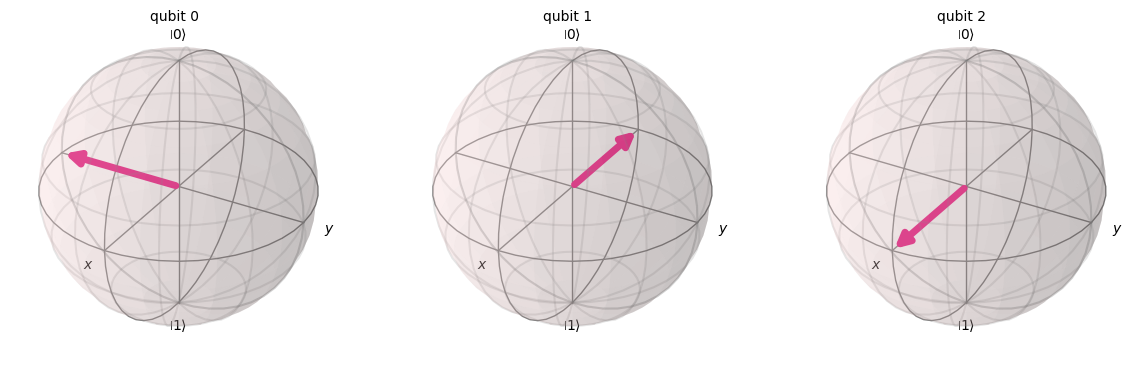

In [92]:
def process_qbit(qc: QuantumCircuit, qbit: int):
    
    qc.h(qbit)

    for i in range(1, qc.num_qubits - qbit):
        qc.cp(np.pi / (2 ** i), qbit + i, qbit)
    
    return qc

def swap_registers(circuit: QuantumCircuit):
    for qubit in range(circuit.num_qubits // 2):
        circuit.swap(qubit, circuit.num_qubits - qubit - 1)
    return circuit


def qft(qc: QuantumCircuit):

    swap_registers(qc)

    for i in range(qc.num_qubits):
        process_qbit(qc, i)

    
    return qc

qc = QuantumCircuit(3)

qc.x(2)
qc.x(1)
qc.draw()

sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

qft(qc)
qc.draw('mpl')

qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

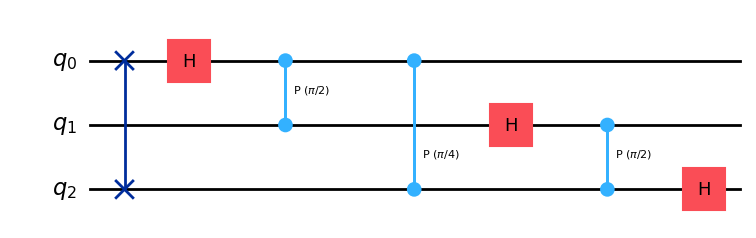

In [93]:
example_qft = QuantumCircuit(3)
qft(example_qft)
example_qft.draw('mpl')

## IQFT

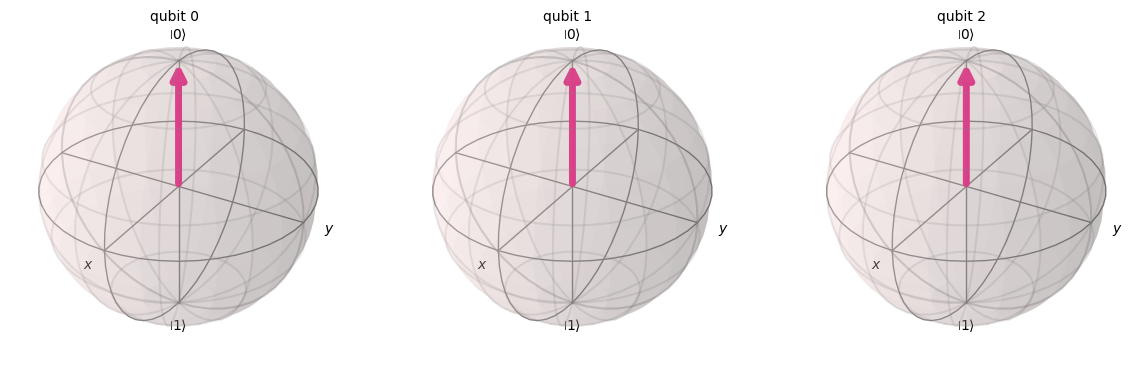

In [94]:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(1)
qc.draw()

sim = Aer.get_backend("aer_simulator")

qft(qc)
qc.draw('mpl')

inv = qc.inverse()
qc.compose(inv, inplace=True)
qc.draw('mpl')

qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)


State preparation

In [6]:
def prepare(qc: QuantumCircuit, b: np.array):
    b_normalized = b / np.linalg.norm(b)
    qc.initialize(b_normalized, qc.qubits)

In [7]:
def plot_qubit_states(statevector, title):
    num_qubits = statevector.num_qubits
    fig = plt.figure(figsize=(num_qubits * 3, 3))
    for qubit in range(num_qubits):
        rho = partial_trace(statevector, [q for q in range(num_qubits) if q != qubit])
        x = rho.expectation_value(Pauli("X")).real
        y = rho.expectation_value(Pauli("Y")).real
        z = rho.expectation_value(Pauli("Z")).real
        ax = fig.add_subplot(1, num_qubits, qubit + 1, projection="3d")
        plot_bloch_vector([x, y, z], title=f"Qubit {qubit}", ax=ax)
    plt.suptitle(title)
    plt.show()

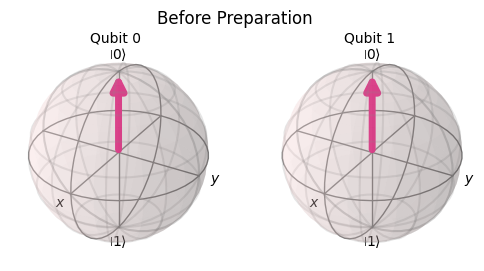

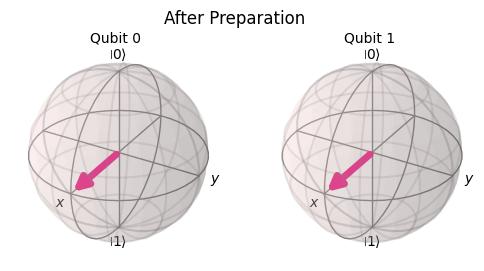

In [8]:
b_reg = QuantumRegister(2, "b")
qc = QuantumCircuit(b_reg)

initial_state = Statevector.from_label("00")

b = np.array([0.5, 0.5, 0.5, 0.5])
prepare(qc, b)

final_state = Statevector(qc)


plot_qubit_states(initial_state, "Before Preparation")
plot_qubit_states(final_state, "After Preparation")

plt.show()

c:\Users\Admin\Desktop\LA\Project\qiskit_env\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: c:\Users\Admin\Desktop\LA\Project\qiskit_env\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


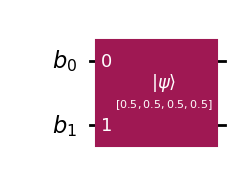

In [9]:
qc.draw("mpl", style="iqx")

Hadamart Gate

In [10]:
def hadamart(qc: QuantumCircuit, qbit: int):
    qc.h(qbit)

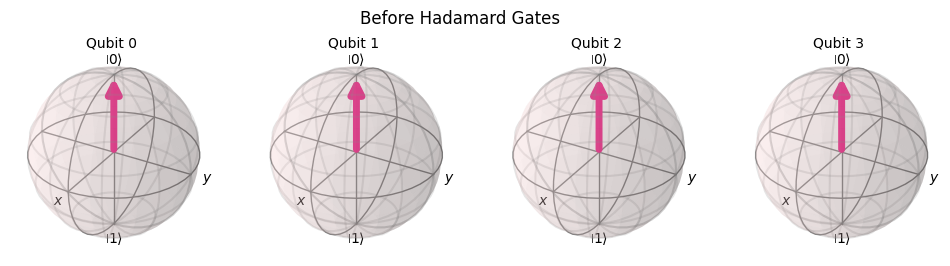

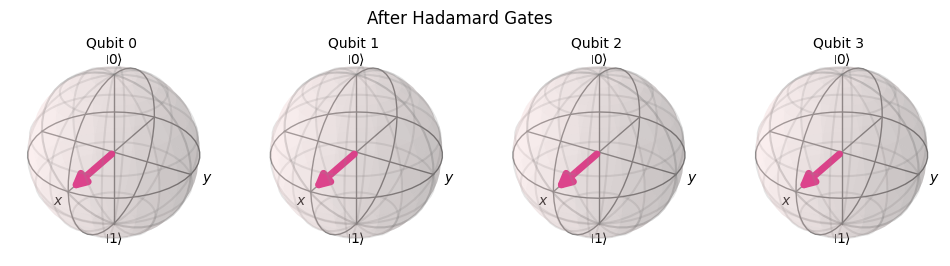

In [11]:
n_qubits = 3
c_reg = QuantumRegister(n_qubits, "c")
b_reg = QuantumRegister(1, "b")
qc = QuantumCircuit(c_reg, b_reg)

initial_state = Statevector.from_label("0" * qc.num_qubits)

for i in range(4):
    hadamart(qc, i)

final_state = Statevector(qc)

plot_qubit_states(initial_state, "Before Hadamard Gates")
plot_qubit_states(final_state, "After Hadamard Gates")

plt.show()

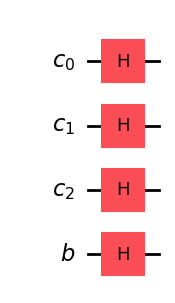

In [12]:
qc.draw("mpl", style="iqx")

Controlled Hamiltonian-gate

In [13]:
def eiAt(circuit, c_reg, b_reg, A, t):

    num_controls = len(c_reg)

    for k in range(num_controls):

        scaled_time = (2**k) * t

        h_gate = HamiltonianGate(-A, scaled_time)
        controlled_h = h_gate.control(1)

        circuit.append(controlled_h, [c_reg[k]] + list(b_reg))


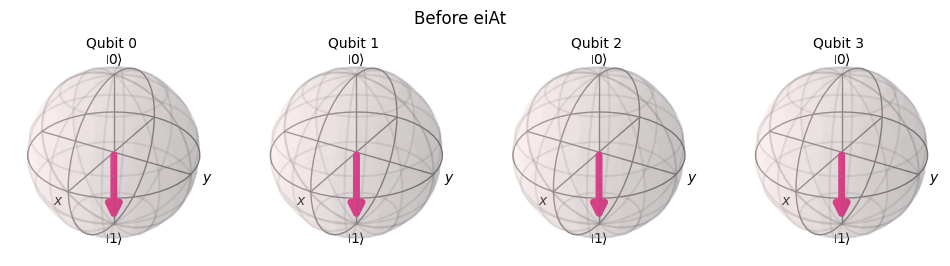

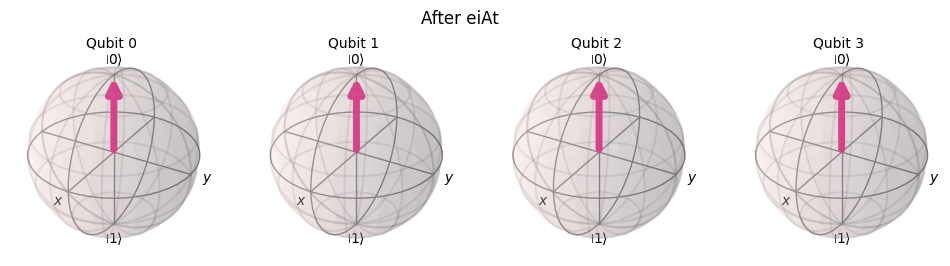

c:\Users\Admin\Desktop\LA\Project\qiskit_env\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: c:\Users\Admin\Desktop\LA\Project\qiskit_env\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


In [14]:
n_qubits = 3
t = 0.1

c_reg = QuantumRegister(n_qubits, "c")
b_reg = QuantumRegister(1, "b")
qc = QuantumCircuit(c_reg, b_reg)

A = SparsePauliOp("Z")

initial_state = Statevector.from_label("1" * qc.num_qubits)

eiAt(qc, c_reg, b_reg, A, t)

final_state = Statevector(qc)

plot_qubit_states(initial_state, "Before eiAt")
plot_qubit_states(final_state, "After eiAt")

qc.draw("mpl", style="iqx")
plt.show()

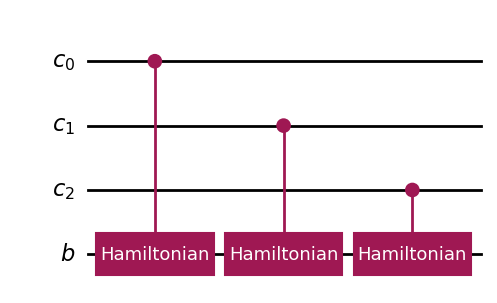

In [15]:
qc.draw("mpl", style="iqx")

Reversed controlled Hamiltonian-gate

In [16]:
def reverse_eiAt(circuit, c_reg, b_reg, A, t):
    num_controls = len(c_reg)

    for k in reversed(range(num_controls)):
        scaled_time = (2**k) * t

        h_gate = HamiltonianGate(A, scaled_time) 
        controlled_h = h_gate.control(1)

        circuit.append(controlled_h, [c_reg[k]] + list(b_reg))

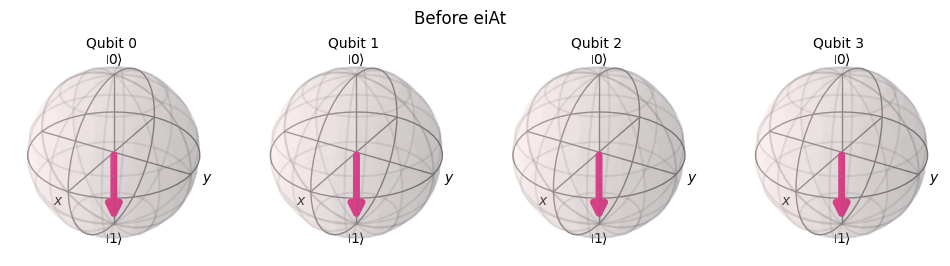

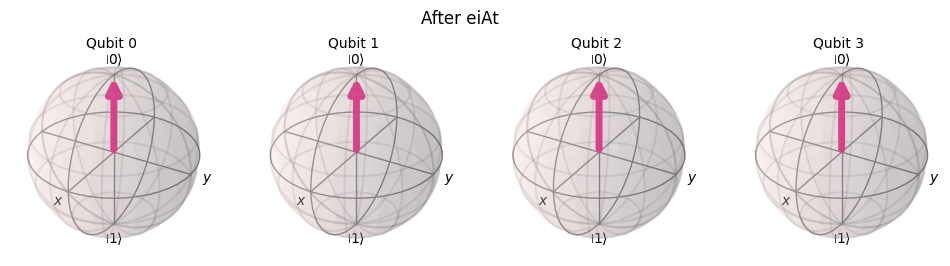

In [17]:
n_qubits = 3
t = 0.1

c_reg = QuantumRegister(n_qubits, "c")
b_reg = QuantumRegister(1, "b")
qc = QuantumCircuit(c_reg, b_reg)

A = SparsePauliOp("Z")

initial_state = Statevector.from_label("1" * qc.num_qubits)

reverse_eiAt(qc, c_reg, b_reg, A, t)

final_state = Statevector(qc)

plot_qubit_states(initial_state, "Before eiAt")
plot_qubit_states(final_state, "After eiAt")

qc.draw("mpl", style="iqx")
plt.show()

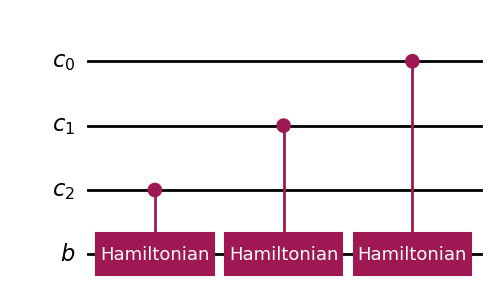

In [18]:
qc.draw("mpl", style="iqx")

Implementation

c:\Users\Admin\Desktop\LA\Project\qiskit_env\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: c:\Users\Admin\Desktop\LA\Project\qiskit_env\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


Probabilities of each state:
0000: 0.1874999999999997
0001: 0.06249999999999989
0010: 1.997614023784704e-32
0011: 7.73057895360855e-33
0100: 4.319947783163861e-33
0101: 1.15750864928216e-33
0110: 3.307461634581867e-35
0111: 7.722542855578657e-33
1000: 0.18749999999999978
1001: 0.5624999999999992
1010: 5.044858008760196e-33
1011: 1.2211637815261452e-32
1100: 6.226775791335861e-33
1101: 6.652291974514592e-33
1110: 2.168033698738326e-34
1111: 1.570501215235079e-33
0.11111111111111106


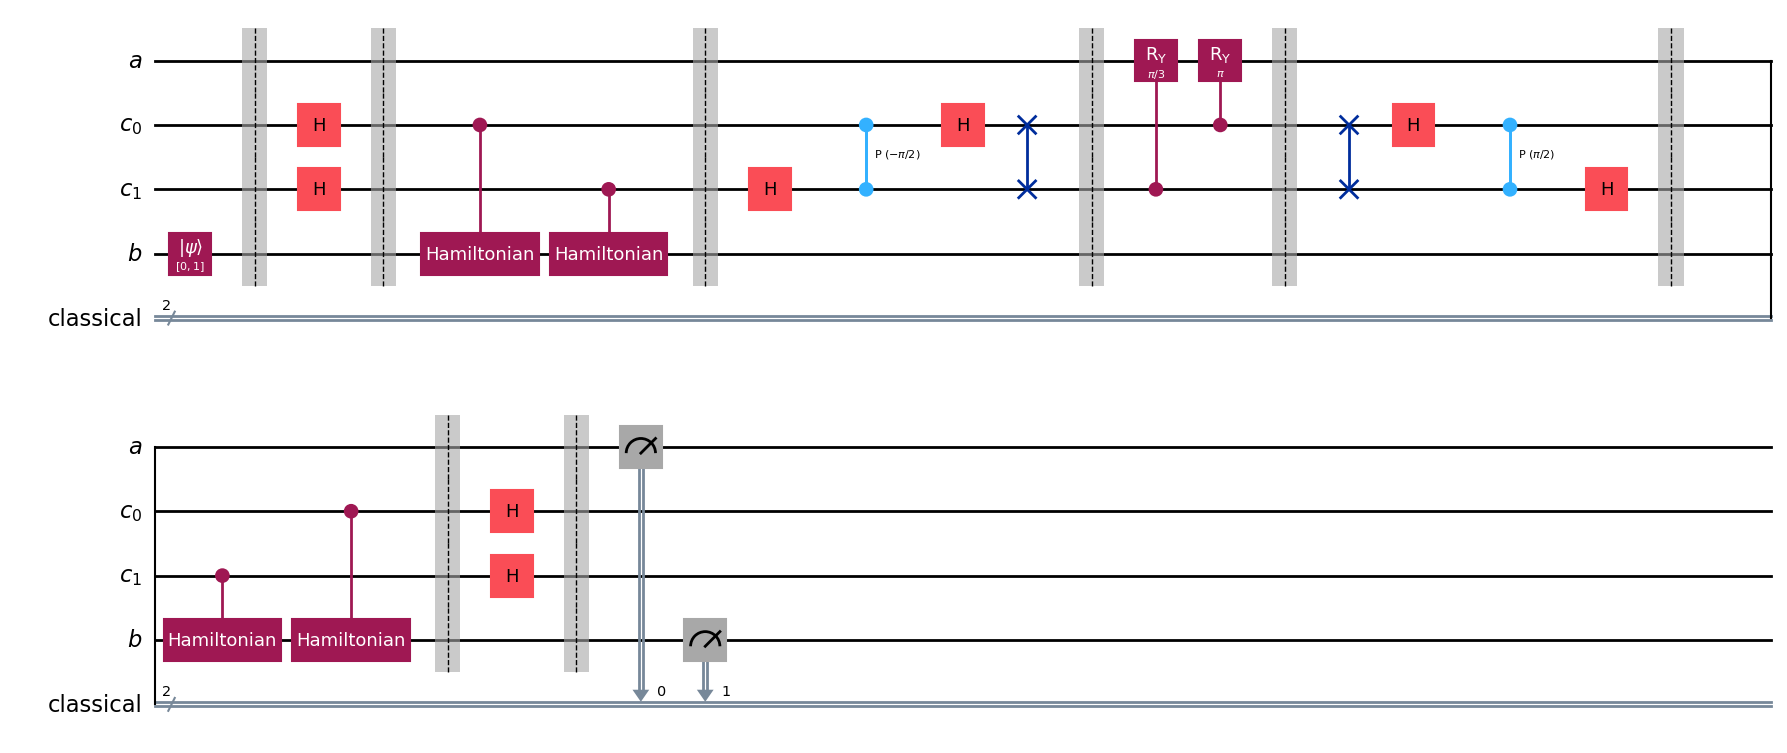

In [ ]:
def prepare_register(qc: QuantumCircuit, b: np.array, target_reg: QuantumRegister):
    b_normalized = b / np.linalg.norm(b)
    qc.initialize(b_normalized, target_reg)

def eiAt(circuit, c_reg, b_reg, A, t):

    num_controls = len(c_reg)

    for k in range(num_controls):

        scaled_time = (2**k) * t

        h_gate = HamiltonianGate(-A, scaled_time)

        controlled_h = h_gate.control(1)
        circuit.append(controlled_h, [c_reg[k]] + list(b_reg))
    
    return circuit

def reverse_eiAt(circuit, c_reg, b_reg, A, t):
    num_controls = len(c_reg)

    for k in reversed(range(num_controls)):
        scaled_time = (2**k) * t

        h_gate = HamiltonianGate(A, scaled_time) 

        controlled_h = h_gate.control(1)

        circuit.append(controlled_h, [c_reg[k]] + list(b_reg))


eigvals = np.linalg.eigvals(A)
min_eigh = min(abs(eigvals))
norm_eigh = eigvals / min_eigh


n_c = ceil(max(norm_eigh)).bit_length()
A = np.array([[1, -1/3], [-1/3, 1]])
b = np.array([0, 1])
t = 3 * pi / 4

c_reg = QuantumRegister(n_c, "c")
b_reg = QuantumRegister(1, "b")
a_reg = QuantumRegister(1, "a")
clas = ClassicalRegister(2, "classical")

qc = QuantumCircuit(a_reg, c_reg, b_reg, clas)

prepare_register(qc, b, b_reg)
qc.draw("mpl", style="iqx")

qc.barrier()

for qubit in c_reg:
    qc.h(qubit)

qc.barrier()

eiAt(qc, c_reg, b_reg, A, t)

qc.barrier()

qft_circuit = QuantumCircuit(c_reg)
qft(qft_circuit)
inverse_qft = qft_circuit.inverse()
qc.compose(inverse_qft, qubits=c_reg, inplace=True)

qc.barrier()


def add_controlled_rotations(circuit, c_req, a_reg, eigvals, C):
    num_c = len(c_req)

    for eigenval in eigvals:

        binary_repr = format(ceil(eigenval), f"0{num_c}b")

        control_qubits = [c_req[num_c - i - 1] for i, bit in enumerate(binary_repr) if bit == "1"]

        rotation = RYGate(2 * np.arcsin(C / eigenval)).control(len(control_qubits))

        circuit.append(rotation, control_qubits + [a_reg[0]])

add_controlled_rotations(qc, c_reg, a_reg, norm_eigh, 1)

qc.barrier()

qc.compose(qft_circuit, qubits=c_reg, inplace=True)

qc.barrier()

reverse_eiAt(qc, c_reg, b_reg, A, t)

qc.barrier()

for qubit in c_reg:
    qc.h(qubit)

qc.barrier()

cur_state = Statevector(qc)

probabilities = cur_state.probabilities_dict()

print("Probabilities of each state:")
for state, prob in probabilities.items():
    print(f"{state}: {prob}")

print(probabilities['0001'] / probabilities['1001'])

qc.measure(a_reg[0], clas[0])
qc.measure(b_reg[0], clas[1])

qc.draw("mpl")

